<a href="https://colab.research.google.com/github/GeorgeTelles/sharpe_sortino_ratio/blob/main/Sharpe_Sortino_Ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Sharpe e Sortino Ratios**

#### Cálculo e comparação entre as duas importantes métricas de risco: Sharpe e Sortino
---


Antes de selecionar um ativo financeiro, os investidores devem buscar o retorno ajustado ao risco e não apenas o retorno simples. Diante disso surge uma dúvida, qual indice utilizar para medir esse retorno ajustado ao risco? o Indice Sharpe ou o Indice Sortino? será que eles são relacionados? São essas questões que vamos analisar aqui.



---







O índice de Sharpe e o índice de Sortino são métricas de retorno sobre o investimento ajustadas ao risco. O índice de Sharpe indica o desempenho de um investimento em comparação com um investimento sem risco, levando em consideração o nível de risco adicional envolvido em manter o investimento em ações. O índice Sortino é uma variação do índice Sharpe que considera apenas o risco negativo.



---



$\textbf{Sharpe ratio} = \frac{R{p}-R{f}}{{\sigma {p}}}$

where:<br>
$R{p}$ = return of portfolio (or stock)<br>
$R{f}$ = risk-free rate<br>
$\sigma {p}$ = standard deviation of returns<br>


$\textbf{Sortino ratio} = \frac{R{p}-R{f}}{{\sigma {p}}}$

where:<br>
$R{p}$ = return of portfolio (or stock)<br>
$R{f}$ = risk-free rate<br>
$\sigma {p}$ = standard deviation of the negative returns<br>

# 1. Instalação e importação das bibliotecas

In [1]:
!pip install quantstats
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 573.0 kB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import quantstats as qs
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 2. Obtenção de dados

Inicialmente, vamos observar como os dois índices estão correlacionados

Obter dados de BTC-USD

In [3]:
df_btc = yf.download('BTC-USD', start = '2018-01-01')[['Close']]

[*********************100%%**********************]  1 of 1 completed


In [4]:
df_btc.head()

,Close
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000


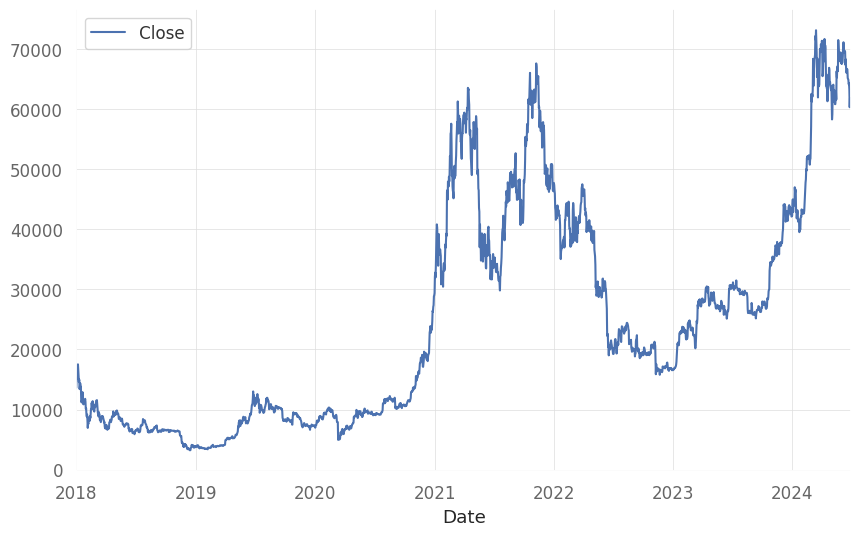

In [5]:
df_btc.plot();

# 3. Análise das Métricas

Aqui calculamos Sharpe e Sortino ratios considerando uma taxa livre de risco de 5% por semestre usando uma função rolling da biblioteca quantstats.

In [6]:
sharpe_qs = pd.Series(qs.stats.rolling_sharpe(df_btc['Close'], rf = 0.05).values)
sortino_qs = pd.Series(qs.stats.rolling_sortino(df_btc['Close'], rf = 0.05).values)
sharpe_qs.index = df_btc.index
sortino_qs.index = df_btc.index

Vejamos a correlação entre os dois índices

In [7]:
fig_corr = go.Figure()

fig_corr.add_trace({'type':'scatter',
                    'x': sharpe_qs,
                    'y': sortino_qs,
                    'mode': 'markers',
                    'line':{'color':'blue'}})

fig_corr.update_layout(template='simple_white', paper_bgcolor="#f7f8fa",
                        margin=dict(l=70, r=20, t=20, b=70),
                        xaxis_title='<b>Sharpe', yaxis_title='<b>Sortino',
                        width=500, height=500)

In [8]:
corr, p = stats.pearsonr(sharpe_qs.dropna(), sortino_qs.dropna())
print('Correlação de Pearson, r=%.3f' %corr, 'p=%.3f' %p)

Correlação de Pearson, r=0.990 p=0.000


Com uma correlação tão alta, seria possível tirar algum insight comparando os dois indicadores de risco?

Uma correlação de Pearson de 𝑟 = 0.990 indica uma correlação extremamente alta entre os índices de Sharpe e Sortino. Isso significa que há uma relação linear muito forte e positiva entre esses dois indicadores de risco ajustado ao retorno. Quando a correlação é tão alta, isso geralmente sugere que as duas métricas estão capturando essencialmente o mesmo aspecto do desempenho ajustado ao risco, pelo menos em termos lineares.

In [9]:
fig = make_subplots(specs = [[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x = sharpe_qs.index, y = sharpe_qs,
                         name = 'Sharpe', line = dict(color = 'blue', width = 2)),
              secondary_y = False)

fig.add_trace(go.Scatter(x = sortino_qs.index, y = sortino_qs,
                         name = 'Sortino', line = dict(color = 'red', width = 2)),
              secondary_y = False)

fig.add_trace(go.Scatter(x = df_btc.index, y = np.log(df_btc['Close']),
                         name = 'log price BTC-USD', line = dict(color = 'black', width = 2)),
              secondary_y = True)

fig.update_yaxes(title_text = 'Risk-adjuste values', secondary_y = False)
fig.update_yaxes(title_text = 'log price BTC-USD', secondary_y = True)
fig.update_layout(title='<b>Sharpe vs Sortino ratios', xaxis_title="<b>Data", legend_title="",
                  font=dict(family="Arial, Arial, Arial",size=15,color="black"), template = 'simple_white', paper_bgcolor="#f7f8fa",
                  margin=dict(l=75, r=20, t=70, b=70), legend=dict(orientation="h",yanchor="bottom",y=1,xanchor="right",x=0.4),
                  width=1000,height=500)

# 4. Insights a partir da correlação:

Consistência na avaliação de risco: A alta correlação sugere que, em muitos casos, o desempenho relativo das carteiras ou investimentos será semelhante, independentemente de usar o índice de Sharpe ou o índice de Sortino. Isso pode indicar que ambos os índices oferecem resultados consistentes ao avaliar o equilíbrio entre retorno e risco.

Enfoque na volatilidade negativa: Apesar da alta correlação, o índice de Sortino se concentra mais na volatilidade negativa (ou risco downside) do que o índice de Sharpe, que considera a volatilidade total. Se houver diferenças significativas na volatilidade downside entre investimentos ou carteiras, o índice de Sortino pode ser mais informativo para identificar qual deles melhor protege contra perdas.

A decisão sobre qual índice usar pode depender do objetivo específico do investidor:

Se o objetivo é entender o desempenho ajustado ao risco de maneira abrangente, o índice de Sharpe pode ser suficiente, dado que ele captura tanto o risco total quanto o retorno.

Se o foco está na minimização de riscos significativos de desvalorização, especialmente em estratégias conservadoras, o índice de Sortino pode fornecer uma perspectiva mais relevante.

Validação da estratégia de investimento: A alta correlação pode validar a estratégia de usar qualquer um dos índices para tomar decisões de investimento. Se ambos os índices levarem a conclusões semelhantes sobre quais investimentos são preferíveis com base no risco ajustado ao retorno, isso fortalece a confiança na análise realizada.

Em resumo, com uma correlação tão alta entre os índices de Sharpe e Sortino, você pode confiar em qualquer um dos índices para avaliar o risco ajustado ao retorno, mas considere o contexto específico e o objetivo de investimento ao decidir qual índice utilizar.